# Análisis de las carpetas de investigación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Personas físicas

In [136]:
df_fisica = pd.read_csv("data/fisicas.csv")
df_fisica.competencia.unique()

array(['FUERO COMUN', 'INCOMPETENCIAS'], dtype=object)

## Analisis univariado

### Análisis de frecuencia de delitos

In [117]:
delitos_generales = df_fisica["delito"].value_counts()
mayoria = delitos_generales[:10]
otros = delitos_generales[10:]
mayoria["otros"] = otros.sum()
# 32,550 de un total de 51,614 (72.8% de los datos)

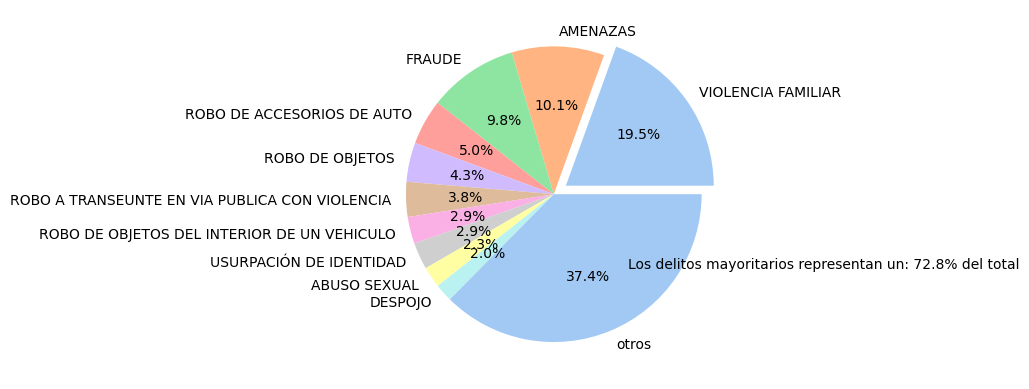

In [142]:
palette = sns.color_palette("pastel")
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Calcular el porcentaje de la mayoría en comparación con el total
total = mayoria.sum() + otros.sum()
porcentaje = (mayoria.sum() *100) / total

# Agregar el texto con el porcentaje en el gráfico
plt.text(0.5, -0.5, f"Los delitos mayoritarios representan un: {porcentaje:.1f}% del total")

plt.pie(mayoria, labels=mayoria.index, colors = palette, autopct='%1.1f%%', explode=explode)

plt.show()

### El 19.5% de los delitos en personas físicas son pertenecientes a la categoría **VIOLENCIA FAMILIAR**, con 10,053 registros encontrados de un total de 51,614

### Análisis de frecuencia de categorias

In [122]:
df_fisica["categoria"].value_counts()

DELITO DE BAJO IMPACTO                                     45987
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        2428
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        1338
VIOLACIÓN                                                    672
HOMICIDIO DOLOSO                                             271
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        249
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      165
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                112
ROBO A NEGOCIO CON VIOLENCIA                                 102
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                         88
ROBO A CASA HABITACIÓN CON VIOLENCIA                          68
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       56
SECUESTRO                                                     38
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 33
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                       7
Name: categoria, dtype: i

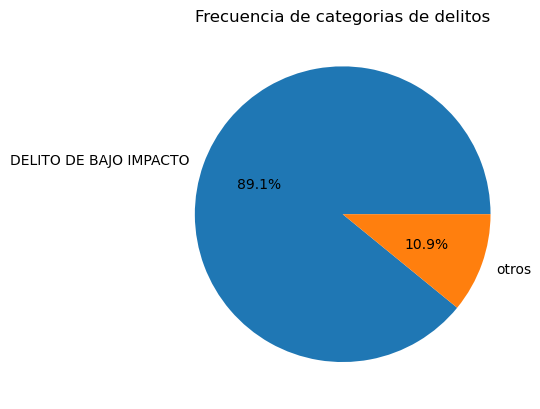

In [144]:
cat_generales = df_fisica["categoria"].value_counts()
cat_mayoria = cat_generales[:1]
cat_otros = cat_generales[1:]
cat_mayoria["otros"] = cat_otros.sum()

plt.pie(cat_mayoria, labels=cat_mayoria.index, autopct='%1.1f%%')
plt.title("Frecuencia de categorias de delitos")

plt.show()


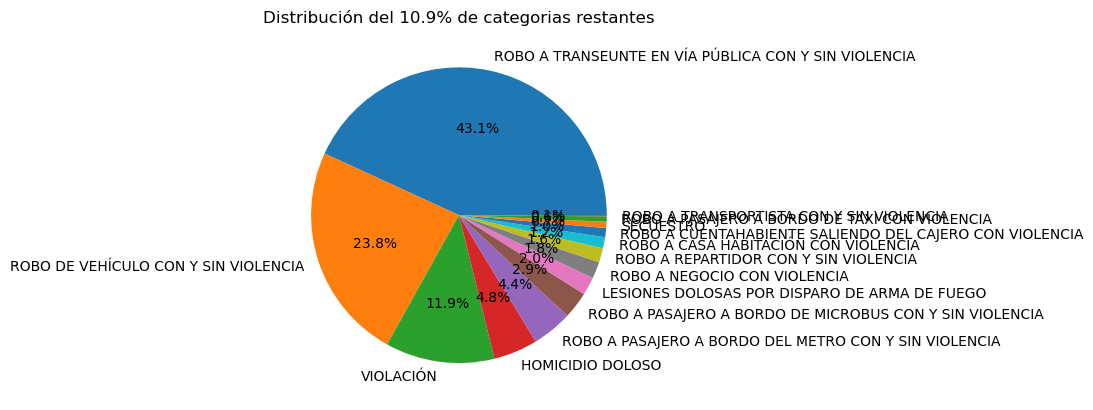

In [145]:
plt.pie(cat_otros, labels=cat_otros.index, autopct='%1.1f%%')
plt.title("Distribución del 10.9% de categorias restantes")

plt.show()

### El 89.1% de los delitos denunciados pertenecen a la categoría de **DELITOS DE BAJO IMPACTO**, con 45,987 registros encontrados

### Análisis de comparación de sexos

In [151]:
sexo_total = df_fisica["sexo"].value_counts()
porc_fem = (26_618 * 100) / sexo_total.sum()
porc_mas = 100 - porc_fem
print(f'Femenino: {porc_fem}, Masculino: {porc_mas}')

Femenino: 51.571279110318905, Masculino: 48.428720889681095


### Las **personas denunciantes** en su mayoría son de sexo Femenino con un porcentaje de 51.57%, mientras que el porcentaje de personas masculinas es de 48.42%

Aún no sabemos si estas personas son las afectadas, eso se analizará cuando se tome en cuenta la **calidad jurídica** de la persona denunciante

### Análisis de edades

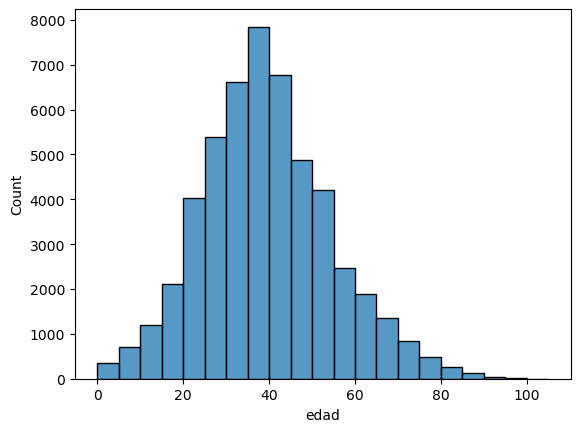

In [194]:
sns.histplot(df_fisica.edad, binwidth=5)

plt.show()

### La media de las edades se concentra en alrededor de los 40 años, a simple vista las edades tienen una distribución normal.

### Análisis de calidades jurídicas de los afectados

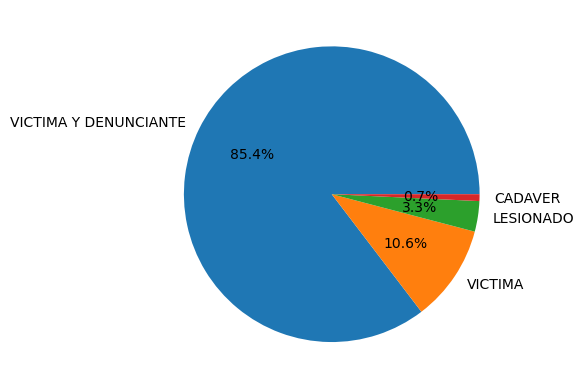

In [213]:
plt.pie(df_fisica.calidad.value_counts(), labels=df_fisica.calidad.value_counts().index, autopct='%1.1f%%')
plt.show()

### El 85.4% de los denunciantes son a su vez las víctimas, mientras que el 10.6% de las víctimas no pueden denunciar por alguna razón.

### Análisis de competencias de delitos denunciados

In [214]:
df_fisica.competencia.unique()

array(['FUERO COMUN', 'INCOMPETENCIAS'], dtype=object)

## Análisis multivariado

1. Relación que existe entre el delito de violencia familiar y la edad, sexo de la persona victima y denunciante

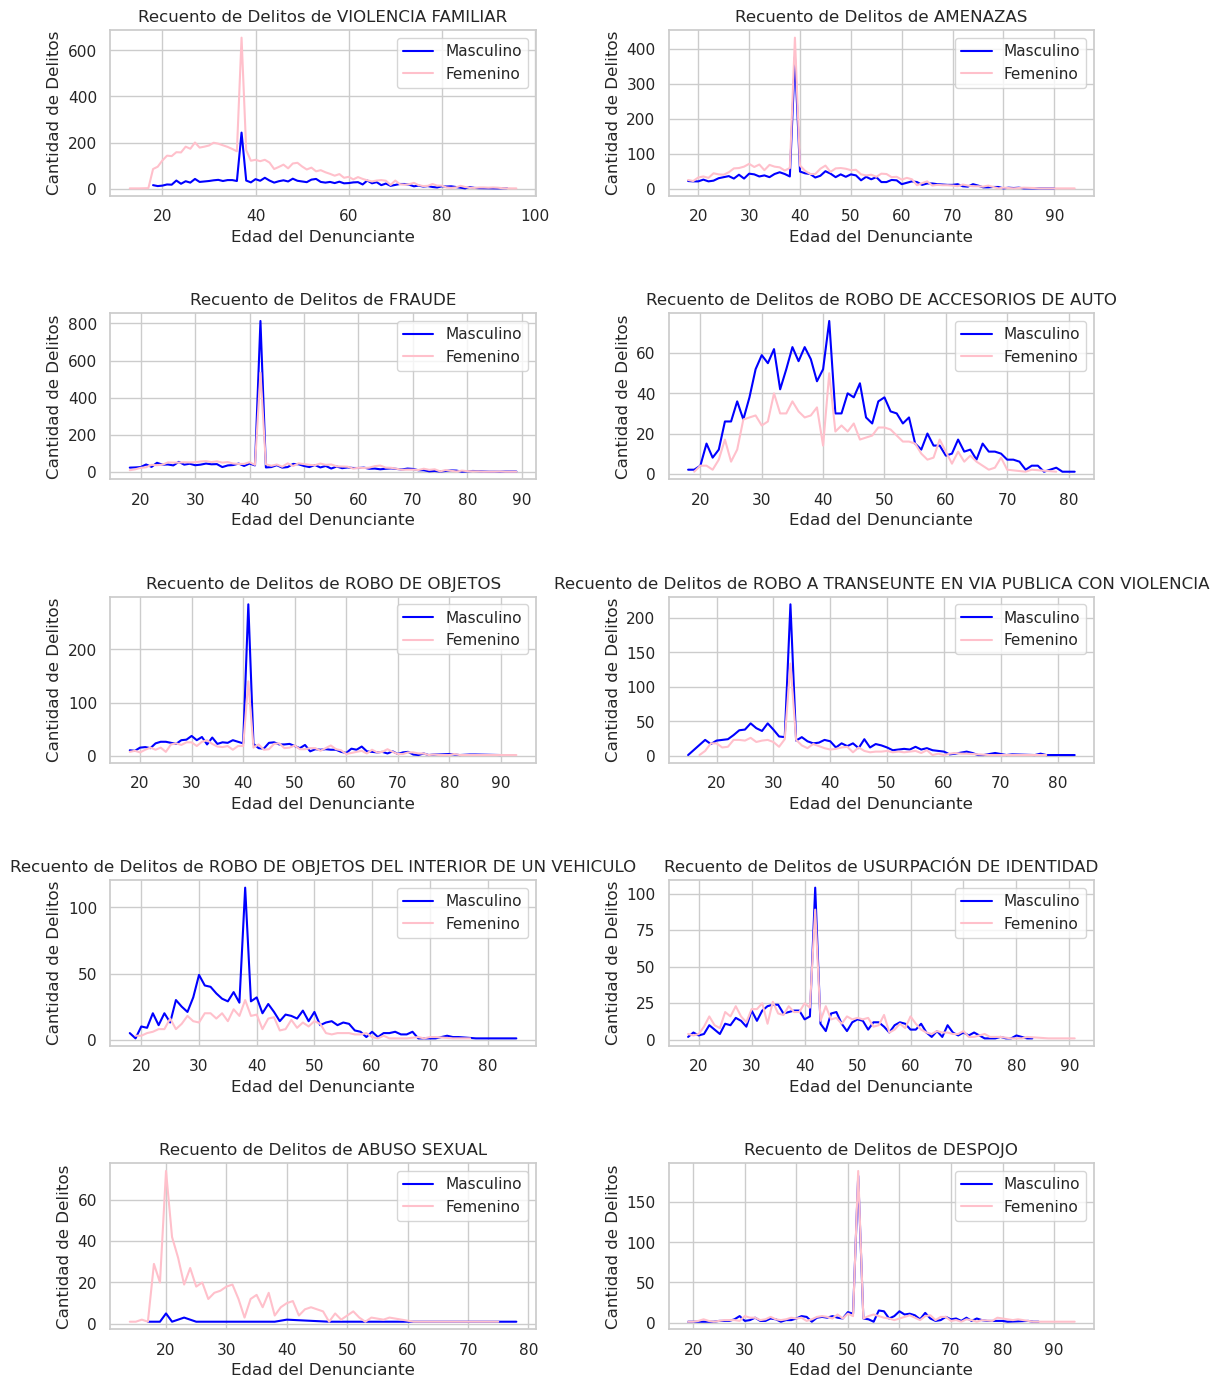

In [116]:
top_10_delitos = df_fisica['delito'].value_counts().nlargest(10).index

df_top_delitos = df_fisica[(df_fisica['delito'].isin(top_10_delitos)) & (df_fisica['calidad'] == 'VICTIMA Y DENUNCIANTE') & (df_fisica['competencia'] == 'FUERO COMUN')]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
fig.tight_layout(pad=5.0)

for i, delito in enumerate(top_10_delitos):
    df_delito = df_top_delitos[df_top_delitos['delito'] == delito]
    df_masculino = df_delito[df_delito['sexo'] == 'Masculino']
    df_femenino = df_delito[df_delito['sexo'] == 'Femenino']
    
    conteo_masculino = df_masculino['edad'].value_counts()
    conteo_femenino = df_femenino['edad'].value_counts()
    
    conteo_masculino = conteo_masculino.sort_index()
    conteo_femenino = conteo_femenino.sort_index()
    
    ax = axes[i // 2, i % 2]
    sns.lineplot(x=conteo_masculino.index, y=conteo_masculino.values, color='blue', label='Masculino', ax=ax)
    sns.lineplot(x=conteo_femenino.index, y=conteo_femenino.values, color='pink', label='Femenino', ax=ax)
    
    ax.set_xlabel('Edad del Denunciante')
    ax.set_ylabel('Cantidad de Delitos')
    ax.set_title(f'Recuento de Delitos de {delito}')
    ax.legend()

plt.show()

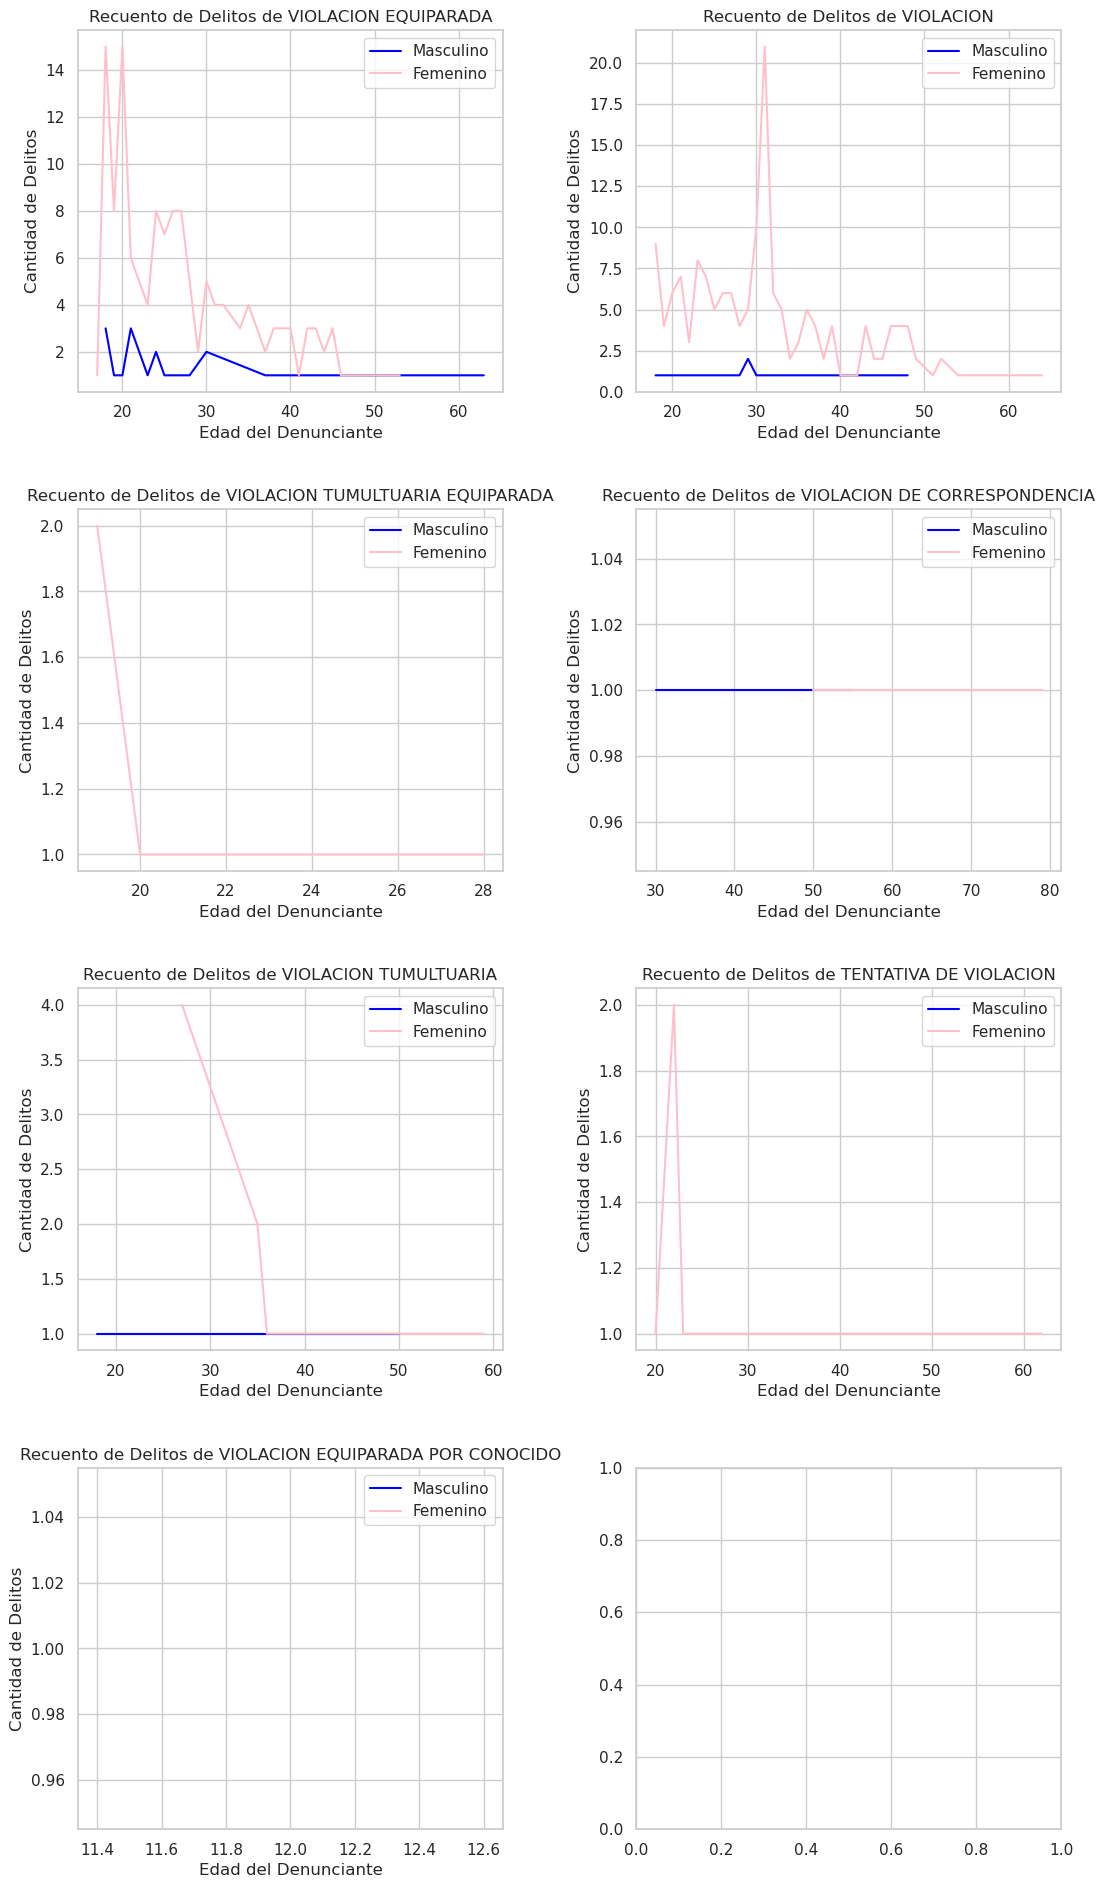

In [ ]:
def graficas(df):
    delitos_violacion = df['delito'].unique()

    if len(delitos_violacion) == 0:
        print("No se encontraron datos que cumplan los filtros.")
        return

    num_plots = len(delitos_violacion)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5*num_rows))
    fig.tight_layout(pad=5.0)

    for i, delito in enumerate(delitos_violacion):
        df_delito = df[df['delito'] == delito]
        df_masculino = df_delito[df_delito['sexo'] == 'Masculino']
        df_femenino = df_delito[df_delito['sexo'] == 'Femenino']
    
        row = i // 2  # Calcular el número de fila
        col = i % 2  # Calcular el número de columna
    
        ax = axes[row, col] if num_rows > 1 else axes[col]  # Seleccionar el subplot correcto
        conteo_masculino = df_masculino['edad'].value_counts().sort_index()
        conteo_femenino = df_femenino['edad'].value_counts().sort_index()
    
        ax.plot(conteo_masculino.index, conteo_masculino.values, color='blue', label='Masculino')
        ax.plot(conteo_femenino.index, conteo_femenino.values, color='pink', label='Femenino')
    
        ax.set_xlabel('Edad del Denunciante')
        ax.set_ylabel('Cantidad de Delitos')
        ax.set_title(f'Recuento de Delitos de {delito}')
        ax.legend()

    plt.show()


busqueda = ["VIOLACION", "PASAJERO", "ROBO", "HOMICIDIO"]

for search in busqueda:
    df_violacion = df_fisica[df_fisica['delito'].str.contains(search)]
    delitos_violacion = df_violacion[(df_violacion['calidad'] == 'VICTIMA Y DENUNCIANTE') & (df_violacion['competencia'] == 'FUERO COMUN')]
    
    graficas(delitos_violacion)
